# Новый раздел

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_excel('train.xlsx')
df.sort_values(by='Order Date')

,ID,Order Date,Class,Region,Sub-Category,Sales
9799,7981,2015-01-03,Стандарт,Урал,Paper,11726.470
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472
...,...,...,...,...,...,...
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610


In [72]:
r = df.groupby('Region').agg({'Sales':sum})
r['Percent'] = round(r/r.sum()* 100, 2)
r

<ipython-input-72-4bedff1f421a>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  r = df.groupby('Region').agg({'Sales':sum})


,Sales,Percent
Region,,
Владивосток,"63,952,686.9",28.5
Калиниград,"71,930,299.7",32.0
Москва,"36,891,651.5",16.4
Урал,"51,858,587.7",23.1


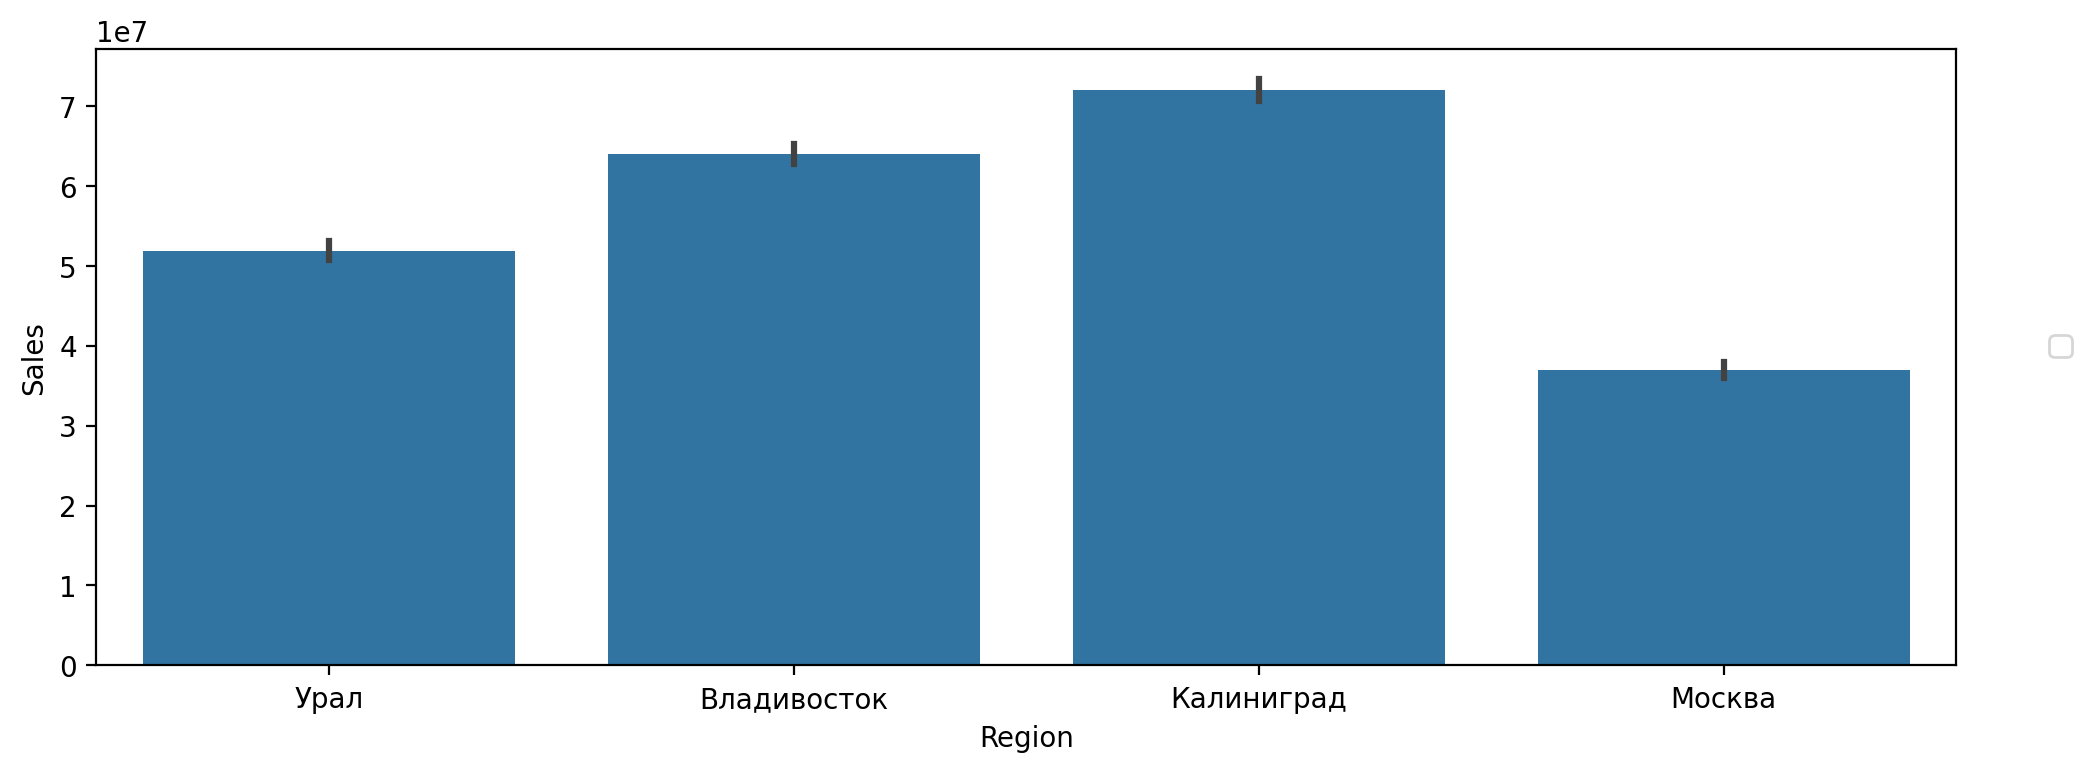

In [69]:
plt.figure(figsize=(12,4), dpi=200)
sns.barplot(data=df, x = 'Region', y = 'Sales', estimator='sum')
plt.legend(loc=(1.05, 0.5))


<Axes: ylabel='Percent'>

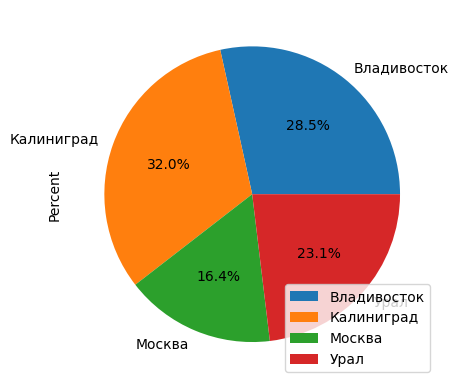

In [75]:
r.plot(kind='pie', y='Percent', autopct='%1.1f%%')

Наибольший объем продаж за исследуемый период  приходится на Калиниград(32%), наименьший показывает Москва(16,4%)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            9800 non-null   int64         
 1   Order Date    9800 non-null   datetime64[ns]
 2   Class         9800 non-null   object        
 3   Region        9800 non-null   object        
 4   Sub-Category  9800 non-null   object        
 5   Sales         9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 459.5+ KB


In [4]:
df.shape

(9800, 6)

In [27]:
pd.options.display.float_format ='{:,.1f}'.format

In [28]:
df_sub_cat = df.groupby('Sub-Category').agg({'Sales':sum})
df_sub_cat['Percent'] = round(df_sub_cat/df_sub_cat.sum()* 100, 2)
df_sub_cat.sort_values(by='Sales', ascending=False).head(5)

<ipython-input-28-8840589eb4d8>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_sub_cat = df.groupby('Sub-Category').agg({'Sales':sum})


,Sales,Percent
Sub-Category,,
Binders,"33,911,974.3",15.1
Paper,"30,690,768.3",13.7
Furnishings,"21,565,066.0",9.6
Phones,"20,343,266.0",9.1
Storage,"18,892,804.2",8.4


Наибольший объем продаж за весь рассматриваемый период обеспечили такие катеории товаров как: Binders(15.1%), Paper(13,7 %), Furnishings(9,6%), Phones(9.1%). За последний год данная тенденция не изменилась, удельный вес рассматриваемых категорий менялся незначительно: рост спроса на данные категории увеличивается вместе с общим объемом продаж.

In [29]:
df_last_2 = df[df['Order Date'].dt.year.isin([2018, 2017])]
df_last_2 = df_last_2.groupby('Sub-Category').agg({'Sales':sum})
df_last_2['Percent'] = round(df_last_2/df_last_2.sum() * 100,2)
df_last_2.sort_values(by='Sales', ascending=False).head(5)


<ipython-input-29-34ed1a6d6515>:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_last_2 = df_last_2.groupby('Sub-Category').agg({'Sales':sum})


,Sales,Percent
Sub-Category,,
Binders,"20,332,043.2",15.3
Paper,"19,112,040.4",14.3
Furnishings,"12,594,092.0",9.4
Phones,"12,030,705.1",9.0
Storage,"11,282,761.2",8.5


In [30]:
df_last_1 = df[df['Order Date'].dt.year ==  2018]
df_last_1 = df_last_1.groupby('Sub-Category').agg({'Sales':sum})
df_last_1['Percent'] = round(df_last_1/df_last_1.sum() * 100,2)
df_last_1.sort_values(by='Sales', ascending=False).head(5)


<ipython-input-30-fd00119d8864>:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_last_1 = df_last_1.groupby('Sub-Category').agg({'Sales':sum})


,Sales,Percent
Sub-Category,,
Binders,"11,431,527.0",15.3
Paper,"10,616,645.2",14.2
Furnishings,"7,317,575.8",9.8
Phones,"6,730,458.2",9.0
Storage,"6,292,319.9",8.4


<Axes: >

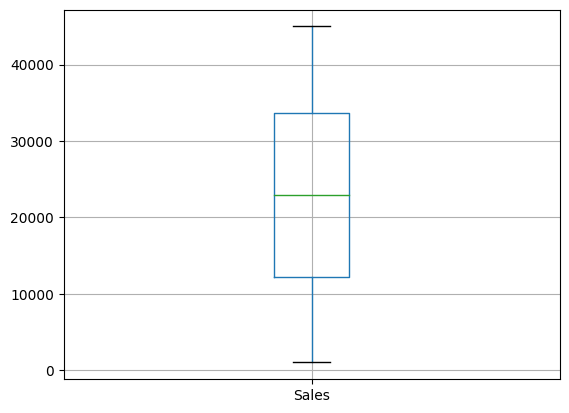

In [31]:
df.boxplot(column = ['Sales'])

<Axes: xlabel='Region', ylabel='Sales'>

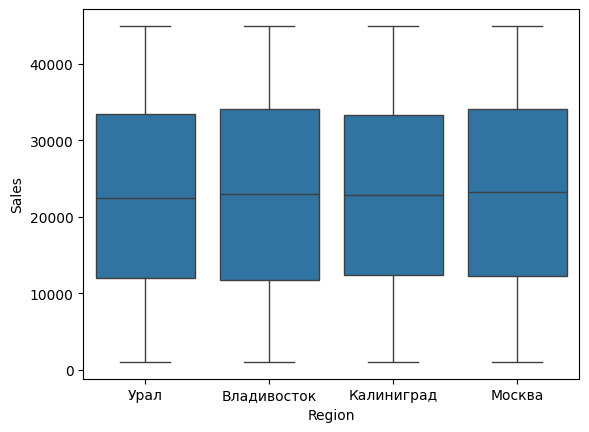

In [79]:
sns.boxplot(data = df, y= 'Sales', x='Region')

В срнднем медианное значение продаж по всех городах отличается незначтельно

In [33]:
df['Sales'].describe()

,Sales
count,"9,800.0"
mean,"22,921.8"
std,"12,602.0"
min,"1,002.8"
25%,"12,135.6"
50%,"22,882.1"
75%,"33,730.1"
max,"44,995.4"


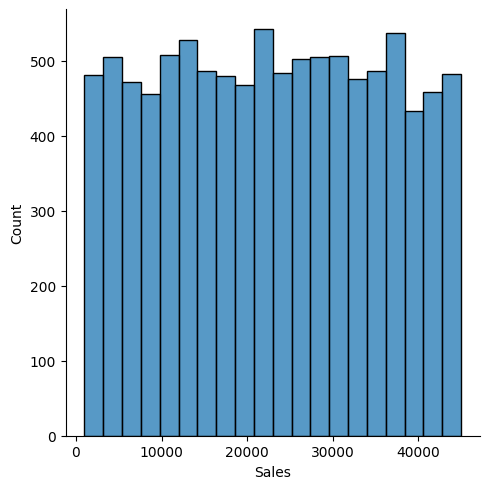

In [34]:
sns.displot(df['Sales'], bins = 20)

In [36]:
# нахождение гарницы методом интерквартильного размаха:
pr_25, pr_75 = np.percentile(df['Sales'], [25, 75])
IQR = pr_75 - pr_25
high_line= pr_75 + 1.5 * IQR
low_line = pr_25 - 1.5 * IQR


In [37]:
# нахождение гарницы методом 3 сигм:
std = np.std(df['Sales'])
mean = np.mean(df['Sales'])
high_line= mean + 3 * std
low_line = mean - 3 * std

df[(df['Sales'] < high_line) & (df['Sales'] > low_line)]

,ID,Order Date,Class,Region,Sub-Category,Sales,Sale_group
0,646,2018-12-30,Стандарт,Урал,Appliances,"37,229.1",Высокие
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,"20,994.6",Средние
2,908,2018-12-30,Стандарт,Владивосток,Phones,"42,133.9",Высокие
3,909,2018-12-30,Стандарт,Владивосток,Binders,"10,612.0",Маленькие
4,1297,2018-12-30,Стандарт,Калиниград,Binders,"28,781.1",Средние
...,...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,"8,639.5",Маленькие
9796,740,2015-01-04,Стандарт,Урал,Labels,"15,246.0",Маленькие
9797,741,2015-01-04,Стандарт,Урал,Storage,"20,415.8",Средние
9798,742,2015-01-04,Стандарт,Урал,Binders,"4,559.1",Маленькие


In [38]:
#определение границ интервалов для продаж
g0=df['Sales'].min()
g3 = df['Sales'].max()
delta = (g3-g0)/3
g1 = df['Sales'].min() + delta
g2 = g1 + delta


In [39]:
def sales_group(x):
  if g0<=x<g1:
    return 'Маленькие'
  elif g1<=x<g2:
    return 'Средние'
  elif g2<=x<=g3:
    return 'Высокие'


df['Sale_group'] = df['Sales'].apply(sales_group)
df

,ID,Order Date,Class,Region,Sub-Category,Sales,Sale_group
0,646,2018-12-30,Стандарт,Урал,Appliances,"37,229.1",Высокие
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,"20,994.6",Средние
2,908,2018-12-30,Стандарт,Владивосток,Phones,"42,133.9",Высокие
3,909,2018-12-30,Стандарт,Владивосток,Binders,"10,612.0",Маленькие
4,1297,2018-12-30,Стандарт,Калиниград,Binders,"28,781.1",Средние
...,...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,"8,639.5",Маленькие
9796,740,2015-01-04,Стандарт,Урал,Labels,"15,246.0",Маленькие
9797,741,2015-01-04,Стандарт,Урал,Storage,"20,415.8",Средние
9798,742,2015-01-04,Стандарт,Урал,Binders,"4,559.1",Маленькие


In [40]:
df_by_reg= df.groupby(['Region','Sale_group']).agg({"Sales": sum})
df_by_reg

<ipython-input-40-f2ffd09f2446>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_by_reg= df.groupby(['Region','Sale_group']).agg({"Sales": sum})


Sales
Region      Sale_group             
Владивосток Высокие    35,449,521.7
            Маленькие   7,862,072.6
            Средние    20,641,092.6
Калиниград  Высокие    37,360,269.0
            Маленькие   8,889,168.1
            Средние    25,680,862.6
Москва      Высокие    19,955,694.1
            Маленькие   4,287,843.4
            Средние    12,648,114.1
Урал        Высокие    27,835,063.9
            Маленькие   6,434,909.8
            Средние    17,588,614.0

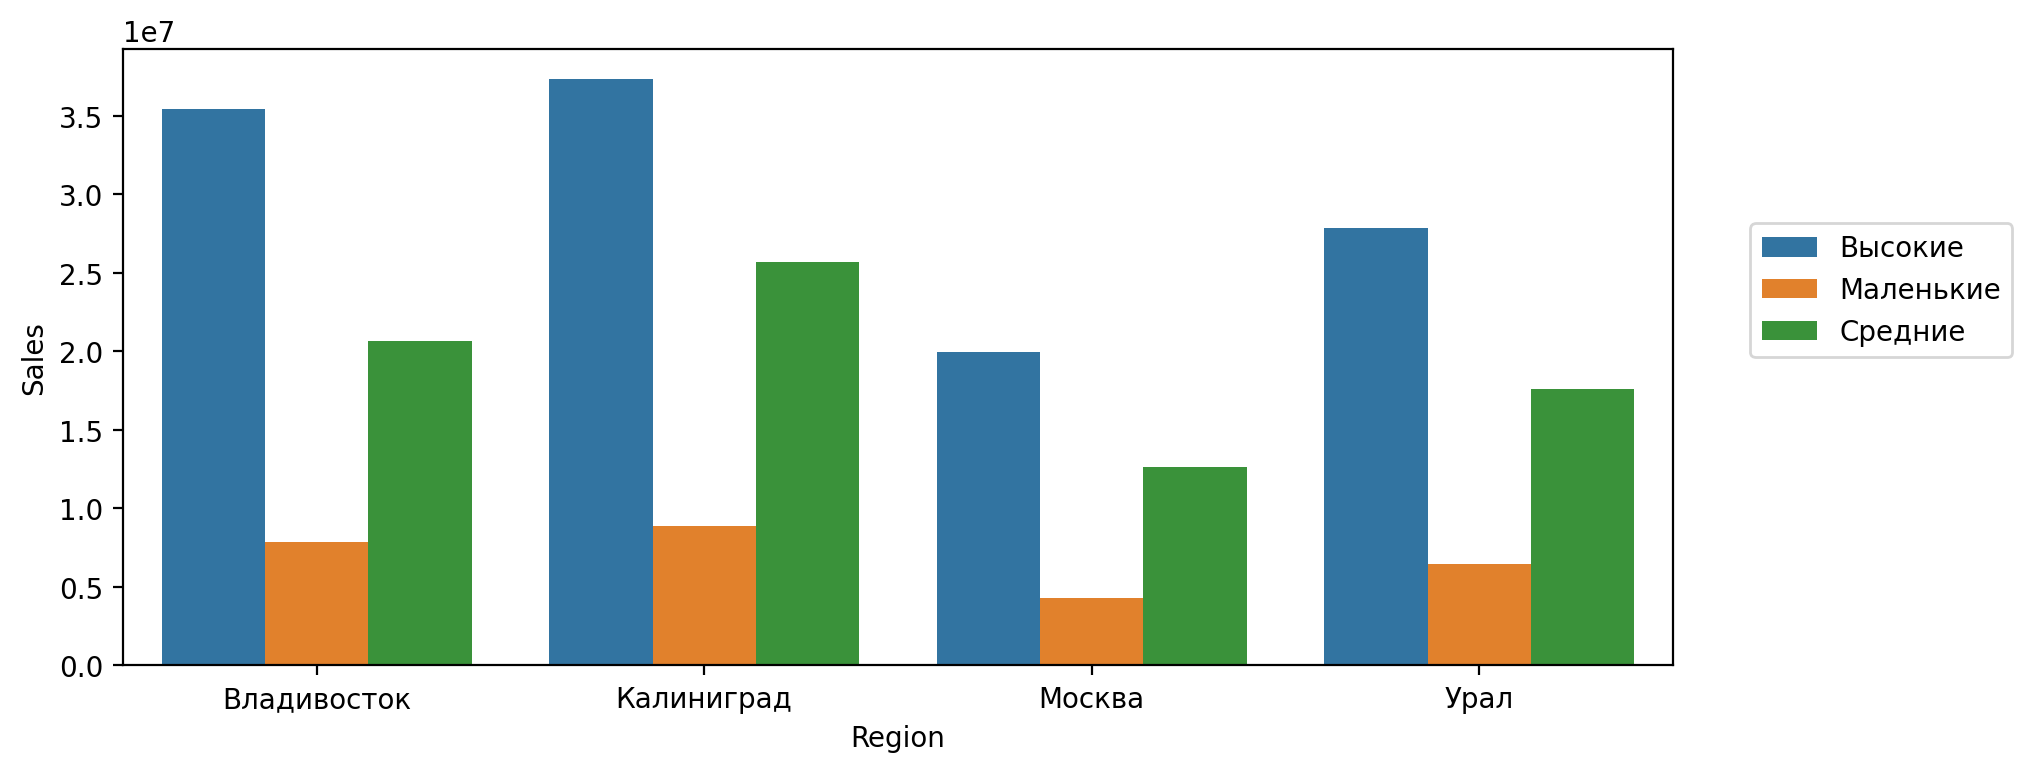

In [63]:
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(data=df_by_reg.reset_index(), x = 'Region', y = 'Sales', hue = 'Sale_group')
plt.legend(loc=(1.05, 0.5))


Наибольший объем продаж во всех исследуемых сегметах('Высокие, Маленькие и Средние') приходится на Калининград, следом за ним идет Владивосток. Москва демонстрирует наименьший объем продаж во всех категориях, что подстверждается стаистикой по общему объему продаж.
Общий объем продаж в Москве почти в 2 раза ниже чем в Калининграде.

<div class="markdown-google-sans">
  <h1>Добро пожаловать в Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Новое&#41; Попробуйте Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


Уже знакомы с Colab? В этом видео рассказывается о функциях, которые вы могли пропустить: интерактивных таблицах, истории выполненного кода и палитре команд.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  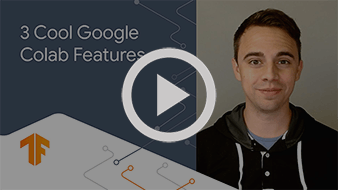
  </a>
</center>

<div class="markdown-google-sans">
  <h2>Что такое Colab?</h2>
</div>

Colaboratory, или просто Colab, позволяет писать и выполнять код Python в браузере. При этом:
- не требуется никакой настройки;
- бесплатный доступ к графическим процессорам;
- предоставлять доступ к документам другим людям очень просто.

Это отличное решение для <strong>студентов</strong>, <strong>специалистов по обработке данных</strong> и <strong>исследователей в области искусственного интеллекта</strong>. Чтобы узнать больше, посмотрите <a href="https://www.youtube.com/watch?v=inN8seMm7UI">ознакомительное видео</a> или начните работу с инструментом ниже.

<div class="markdown-google-sans">

## <strong>Начало работы</strong>
</div>

Документ, который вы читаете, размещен не на статической веб-странице, а в интерактивной среде под названием <strong>блокнот Colab</strong>, позволяющей писать и выполнять код.

Например, вот <strong>ячейка</strong> с коротким скриптом Python, который позволяет рассчитать значение, выразить его в виде переменной и распечатать результат:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Чтобы выполнить код в ячейке выше, выберите ее, а затем нажмите кнопку воспроизведения слева от кода или используйте сочетание клавиш Cmd/Ctrl + Ввод. Чтобы изменить код, достаточно нажать на ячейку.

Переменные, заданные в одной ячейке, можно будет использовать в других ячейках:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Благодаря блокнотам Colab вы можете использовать в одном документе <strong>исполняемый код</strong>, <strong>форматированный текст</strong>, <strong>изображения</strong>, <strong>разметку HTML</strong>, <strong>набор LaTeX</strong> и не только. Блокноты Colab будут храниться на вашем Google Диске. Вы сможете открыть к ним доступ коллегам или друзьям, разрешив им просматривать или даже редактировать документ, а также оставлять комментарии. Подробная информация доступна на <a href="/notebooks/basic_features_overview.ipynb">этой странице</a>. Чтобы создать блокнот Colab, можно воспользоваться меню "Файл" выше или <a href="http://colab.research.google.com#create=true">перейти по этой ссылке</a>.

Блокноты Colab – это блокноты Jupyter, которые размещены в сервисе Colab. Подробная информация о проекте Jupyter доступна на сайте <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Анализ и обработка данных
</div>

Colab позволяет использовать для анализа и визуализации данных все возможности популярных библиотек Python. Например, в ячейке ниже используется библиотека <strong>numpy</strong> для генерации случайных данных, а также библиотека <strong>matplotlib</strong> для их визуализации. Чтобы изменить код, достаточно нажать на ячейку.

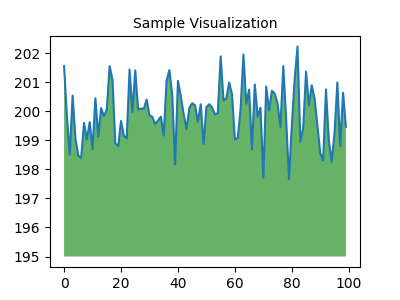

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Вы можете импортировать в блокноты Colab данные из своего аккаунта Google Диска, в том числе из таблиц, а также из GitHub и многих других источников. Чтобы узнать больше об импорте данных и о том, как можно использовать Colab для их анализа и обработки, изучите ссылки в разделе <a href="#working-with-data">Работа с данными</a>.

<div class="markdown-google-sans">

## Машинное обучение
</div>

В Colab вы можете импортировать набор данных изображения, сориентировать на него классификатор изображений и оценить модель с помощью <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">нескольких строк кода</a>. Код в блокнотах Colab исполняется на облачных серверах Google. Это означает, что вы можете использовать аппаратное обеспечение Google, <a href="#using-accelerated-hardware">в том числе графические процессоры и TPU</a>, независимо от мощности вашей машины. Вам нужен только браузер.

Colab активно используется в области машинного обучения, в том числе для:
- знакомства с TensorFlow;
- разработки и обучения нейронных сетей;
- экспериментов с TPU;
- распространения исследований в области ИИ;
- создания руководств.

Примеры использования блокнотов Colab в сфере машинного обучения приведены в разделе <a href="#machine-learning-examples">Примеры использования в машинном обучении</a> ниже.

<div class="markdown-google-sans">

## Ресурсы по теме

### Работа с блокнотами в Colab

</div>

- [Общие сведения о Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Руководство для Markdown](/notebooks/markdown_guide.ipynb)
- [Импорт библиотек и установка зависимостей](/notebooks/snippets/importing_libraries.ipynb)
- [Сохранение и загрузка блокнотов в GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Интерактивные формы](/notebooks/forms.ipynb)
- [Интерактивные виджеты](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Работа с данными
</div>

- [Загрузка данных: Диск, Таблицы и Google Cloud Storage](/notebooks/io.ipynb)
- [Диаграмма: визуализация данных](/notebooks/charts.ipynb)
- [Начало работы с BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Экспресс-курс по машинному обучению

<div>

Вот несколько блокнотов из онлайн-курса по машинному обучению от Google. Ещё больше информации доступно на <a href="https://developers.google.com/machine-learning/crash-course/">сайте курса</a>.
- [Знакомство с Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Линейная регрессия в tf.keras с использованием синтетических данных](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Использование ускорителей
</div>

- [TensorFlow с графическими процессорами](/notebooks/gpu.ipynb)
- [TensorFlow с TPU](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Примеры

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>. Инструменты разговорного AI Nvidia NeMo позволяют использовать в аудиозаписи сгенерированный компьютером голос вместо человеческого.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Обучение классификатора изображений</a>. Используя предварительно обученный классификатор изображений, создайте модель Keras для распознавания цветов.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Классификация текста</a>. Разделите отзывы на сайте IMDb на <em>положительные</em> и <em>отрицательные</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Перенос стиля</a>. Используйте модель глубокого обучения, чтобы переносить стиль с одного изображения на другое.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Вопросно-ответный универсальный многоязычный кодировщик</a>. Используйте модель машинного обучения, чтобы отвечать на вопросы из набора данных SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Интерполяция видео.</a> Спрогнозируйте, что произошло между первым и последним кадрами видео.
